In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
timestamp = pd.Timestamp(datetime(2024, 9, 21)) # 21st September 2024

pd.Timestamp("2024-09-21") == timestamp# 21st September 2024

print(timestamp.year) # 2024
print(timestamp.month) # 9
print(timestamp.day) # 21
print(timestamp.day_name()) # Saturday
print(timestamp.weekday()) # 5

2024
9
21
Saturday
5


In [3]:
# We can create a period
period = pd.Period("2024-09")
period

Period('2024-09', 'M')

In [4]:
# Converting monthly period to daily period
period.asfreq('D')

Period('2024-09-30', 'D')

In [5]:
# Converting daily period to monthly period
period.to_timestamp().to_period('M')

Period('2024-09', 'M')

In [6]:
# Adding month to monthly frequency period.
print(period + 3)
print(period + 4)

2024-12
2025-01


In [7]:
# Creating sequence of dates.
index = pd.date_range(start="2024-01-30", periods=12, freq='ME') # ME means MONTH END
print(index)

period_index = index.to_period()
print(period_index)

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='ME')
PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')


In [8]:
data = np.random.random(size=(12,2))
pd.DataFrame(data=data, index=index)

,0,1
2024-01-31,0.827291,0.306287
2024-02-29,0.473538,0.918672
2024-03-31,0.411444,0.503181
2024-04-30,0.133337,0.579305
2024-05-31,0.018375,0.823344
2024-06-30,0.759059,0.454513
2024-07-31,0.392905,0.591665
2024-08-31,0.410410,0.893238
2024-09-30,0.068799,0.641722
2024-10-31,0.909810,0.245251


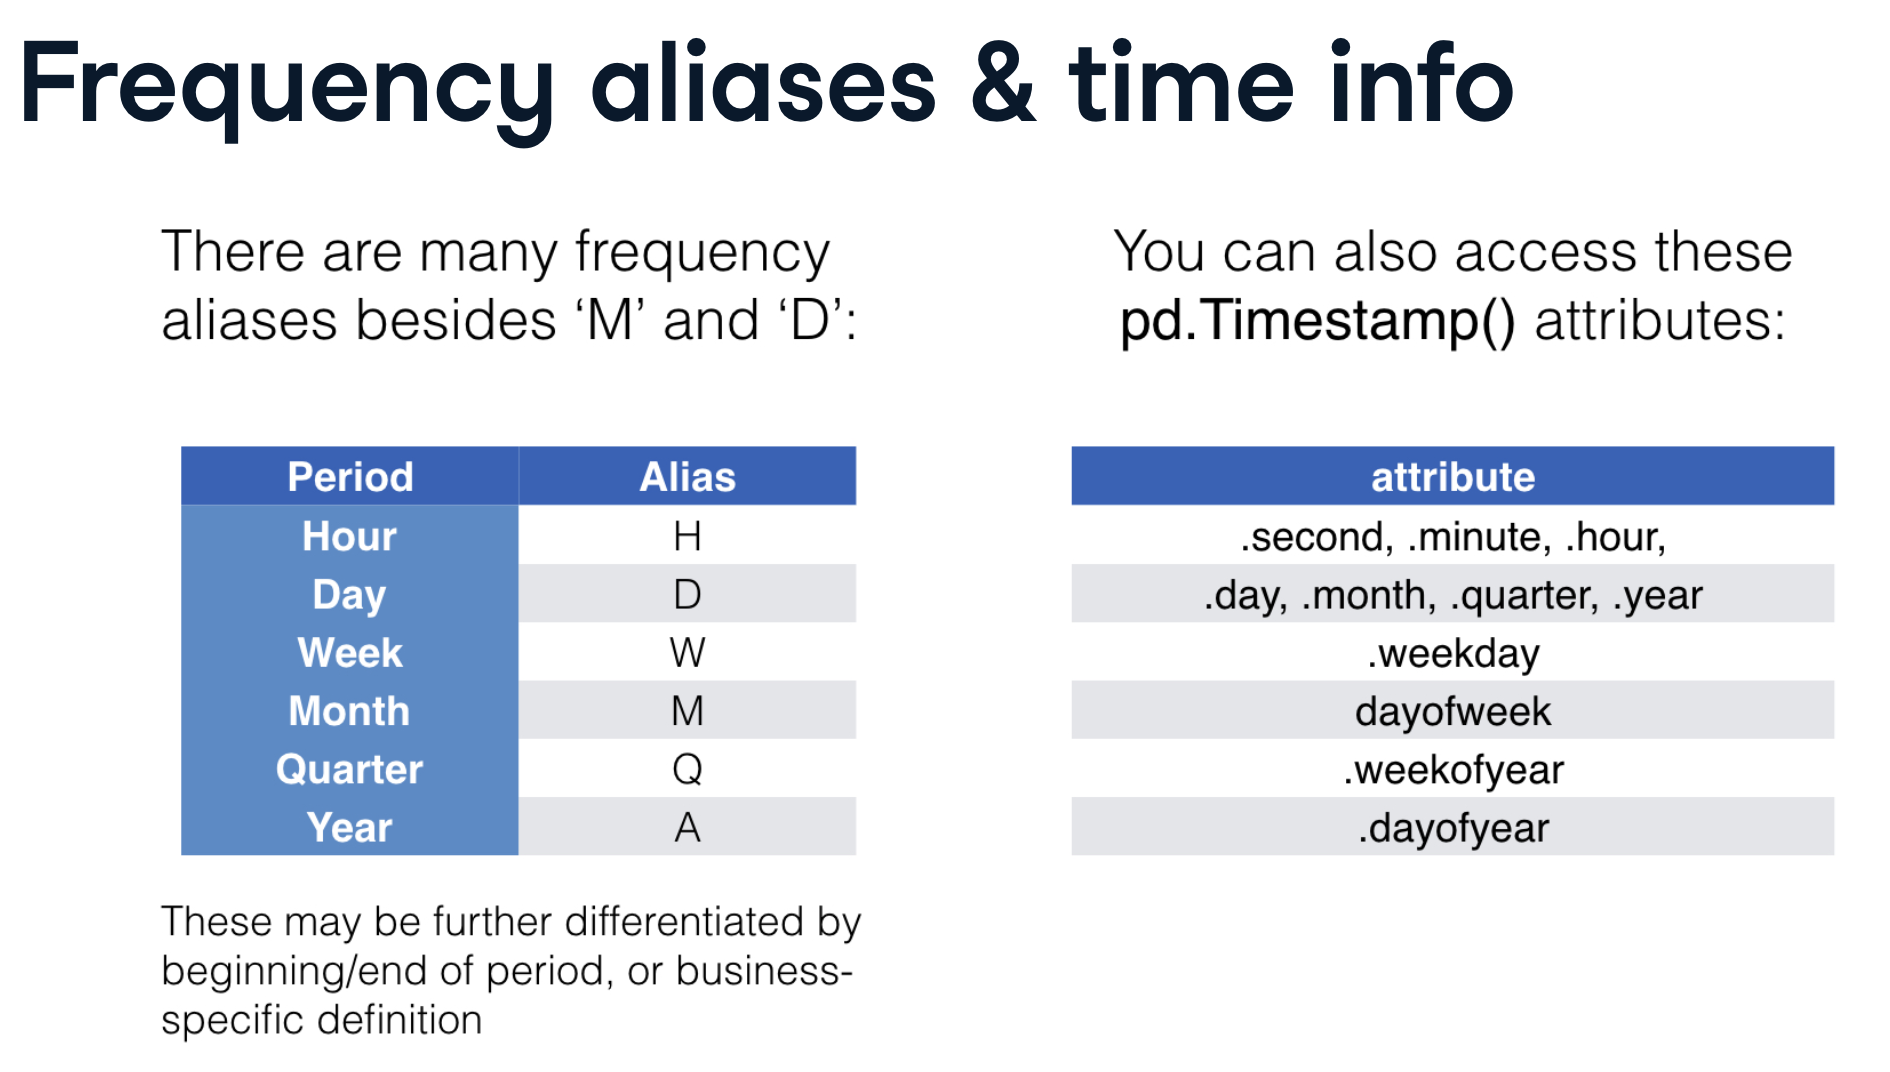

In [29]:
import os
import zipfile
from six.moves import urllib
import pandas as pd

# Veri seti URL'si
DOWNLOAD_ROOT = "https://assets.datacamp.com/production/repositories/1130/datasets/81c22b266e69254a1cc2646c63ec73e20c7c84a3/stock_data.zip"
DATASET_PATH = os.path.join("datasets", "stock_data")

# Veriyi indirme fonksiyonu
def fetch_data(data_url=DOWNLOAD_ROOT, data_path=DATASET_PATH):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, "stock_data.zip")
    urllib.request.urlretrieve(data_url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)

# Veriyi yükleme fonksiyonu
def load_data(data_path=DATASET_PATH):
    csv_path = os.path.join(data_path, "google.csv")
    return pd.read_csv(csv_path)

# Veriyi indir ve yükle
fetch_data()
google = load_data()

google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [30]:
google.dropna(inplace=True)
google.columns = [x.lower() for x in google.columns]

google.date = pd.to_datetime(google.date)
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    756 non-null    datetime64[ns]
 1   close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.7 KB


In [31]:
google.set_index('date', inplace=True)

In [32]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


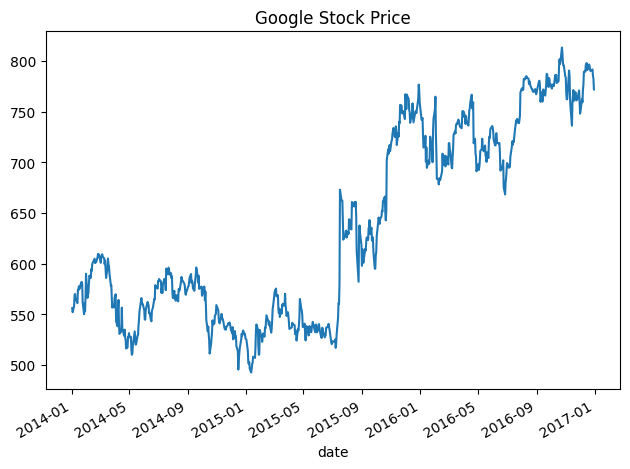

In [35]:
import matplotlib.pyplot as plt

google.close.plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

## Pandas partial string indexing

In [39]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [47]:
# We can filter data with passing years.
for year in ['2014', '2015', '2016']:
    print(f"{int(year)} yilina ait bulunan gözlem sayısı {len(google.loc[year])}")

2014 yilina ait bulunan gözlem sayısı 252
2015 yilina ait bulunan gözlem sayısı 252
2016 yilina ait bulunan gözlem sayısı 252


In [51]:
# We can filter data with year and month.
print(google.loc['2014-05'].shape)

print(google.loc['2015-03': '2016-01'])

(21, 1)
             close
date              
2015-03-02  571.34
2015-03-03  573.64
2015-03-04  573.37
2015-03-05  575.33
2015-03-06  567.68
...            ...
2016-01-25  711.67
2016-01-26  713.04
2016-01-27  699.99
2016-01-28  730.96
2016-01-29  742.95

[232 rows x 1 columns]


**.asfreq()**: This function sets the frequency. We can set frequency Daily ('D') or Business Day ('B') etc.

In [60]:
# Setting frequency information to dataset.
print("Daily frequency\n\n",google.asfreq('D'),'\n\n\n') # When we set the daily frequency, our dataset has some missing values.
print("Business Day frequency\n\n",google.asfreq('B')) # Business day frequency.


Daily frequency

              close
date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-04     NaN
2014-01-05     NaN
2014-01-06  558.10
...            ...
2016-12-26     NaN
2016-12-27  791.55
2016-12-28  785.05
2016-12-29  782.79
2016-12-30  771.82

[1094 rows x 1 columns] 



Business Day frequency

              close
date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-06  558.10
2014-01-07  568.86
2014-01-08  570.04
...            ...
2016-12-26     NaN
2016-12-27  791.55
2016-12-28  785.05
2016-12-29  782.79
2016-12-30  771.82

[782 rows x 1 columns]


In [62]:
google = google.asfreq('B')
print(google.isna().sum())
google[google.close.isna()]

close    26
dtype: int64


,close
date,
2014-01-20,NaN
2014-02-17,NaN
2014-04-18,NaN
2014-05-26,NaN
2014-07-04,NaN
2014-09-01,NaN
2014-11-27,NaN
2014-12-25,NaN
2015-01-01,NaN


# Manipulating Time Series Data

In [67]:
google = pd.read_csv('datasets/stock_data/google.csv', parse_dates=['Date'], index_col='Date').dropna()

google.columns = [x.lower() for x in google.columns]
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [72]:
google['shifted'] = google.close.shift(periods=1) 
google.head()

,close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-06,558.10,551.95
2014-01-07,568.86,558.10
2014-01-08,570.04,568.86


In [73]:
# Lagged version
google['lagged'] = google.close.shift(periods=-1)
google.tail()

,close,shifted,lagged
Date,,,
2016-12-23,789.91,791.26,791.55
2016-12-27,791.55,789.91,785.05
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN


In [74]:
# Calculate one period percent change
google['change'] = google.close.div(google.shifted)
google.head()

,close,shifted,lagged,change
Date,,,,
2014-01-02,556.00,NaN,551.95,NaN
2014-01-03,551.95,556.00,558.10,0.992716
2014-01-06,558.10,551.95,568.86,1.011142
2014-01-07,568.86,558.10,570.04,1.019280
2014-01-08,570.04,568.86,564.55,1.002074


In [78]:
# Calculating one period percent change
google['return'] = google.change.sub(1).mul(100)
google.head()

,close,shifted,lagged,change,return
Date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,558.10,0.992716,-0.728417
2014-01-06,558.10,551.95,568.86,1.011142,1.114231
2014-01-07,568.86,558.10,570.04,1.019280,1.927970
2014-01-08,570.04,568.86,564.55,1.002074,0.207432


In [82]:
# Calculating differance between close priceses.
google['diff'] = google.close.diff()
google[['close', 'diff']].head()

,close,diff
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,-4.05
2014-01-06,558.10,6.15
2014-01-07,568.86,10.76
2014-01-08,570.04,1.18


In [84]:
# Calculating percent change
google['pct_change'] = google.close.pct_change().mul(100)
google[['close', 'return', 'pct_change']]

,close,return,pct_change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,-0.728417,-0.728417
2014-01-06,558.10,1.114231,1.114231
2014-01-07,568.86,1.927970,1.927970
2014-01-08,570.04,0.207432,0.207432
...,...,...,...
2016-12-23,789.91,-0.170614,-0.170614
2016-12-27,791.55,0.207619,0.207619
2016-12-28,785.05,-0.821174,-0.821174


In [85]:
google['return_3d'] = google.close.pct_change(periods=3).mul(100)
google[['close', 'return_3d']].head()

,close,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-06,558.10,NaN
2014-01-07,568.86,2.312950
2014-01-08,570.04,3.277471
